In [1]:
import pandas as pd 
import numpy as np

In [42]:
data = pd.read_csv(r"C:\Users\joema\Downloads\CarData2.csv")

In [43]:
print(data.head(5)) 

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  Current_Year  Car_Age  
0      Dealer       Manual      0          2025       11  
1      Dealer       Manual      0          2025       12  
2      Dealer       Manual      0          2025        8  
3      Dealer       Manual      0          2025       14  
4      Dealer       Manual      0          2025       11  


In [44]:
key_metrics = ['Selling_Price', 'Present_Price', 'Kms_Driven']

mean_values = data[key_metrics].mean()
median_values = data[key_metrics].median()
max_values = data[key_metrics].max()
min_values = data[key_metrics].min()
var_values = data[key_metrics].var()

summarystats = pd.DataFrame({'mean': mean_values, 'median': median_values,
                             'max': max_values, 'min': min_values, 'var': var_values})

print(summarystats)

                       mean   median       max     min           var
Selling_Price      4.661296      3.6      35.0    0.10  2.583497e+01
Present_Price      7.628472      6.4      92.6    0.32  7.472073e+01
Kms_Driven     36947.205980  32000.0  500000.0  500.00  1.512190e+09


In [45]:
manual_count = data[data['Transmission'] == 'Manual']['Transmission'].count()
automatic_count = data[data['Transmission'] == 'Automatic']['Transmission'].count()

print(f"Manual: {manual_count}, Automatic: {automatic_count}")


Manual: 261, Automatic: 40


In [46]:
dealer_count = data[data['Seller_Type']== 'Dealer']['Seller_Type'].count()
individual_count = data[data['Seller_Type']== 'Individual']['Seller_Type'].count()

print(f"Dealer : {dealer_count}, Individual: {individual_count}")

Dealer : 195, Individual: 106


In [47]:
petrol_count = data[data['Fuel_Type']== 'Petrol']['Fuel_Type'].count()
diesel_count = data[data['Fuel_Type']== 'Diesel']['Fuel_Type'].count()
CNG_count = data[data['Fuel_Type']== 'CNG']['Fuel_Type'].count()

print(f" Petrol_Cars: {petrol_count}, Diesel_Cars: {diesel_count}, CNG_Cars: {CNG_count}")

 Petrol_Cars: 239, Diesel_Cars: 60, CNG_Cars: 2


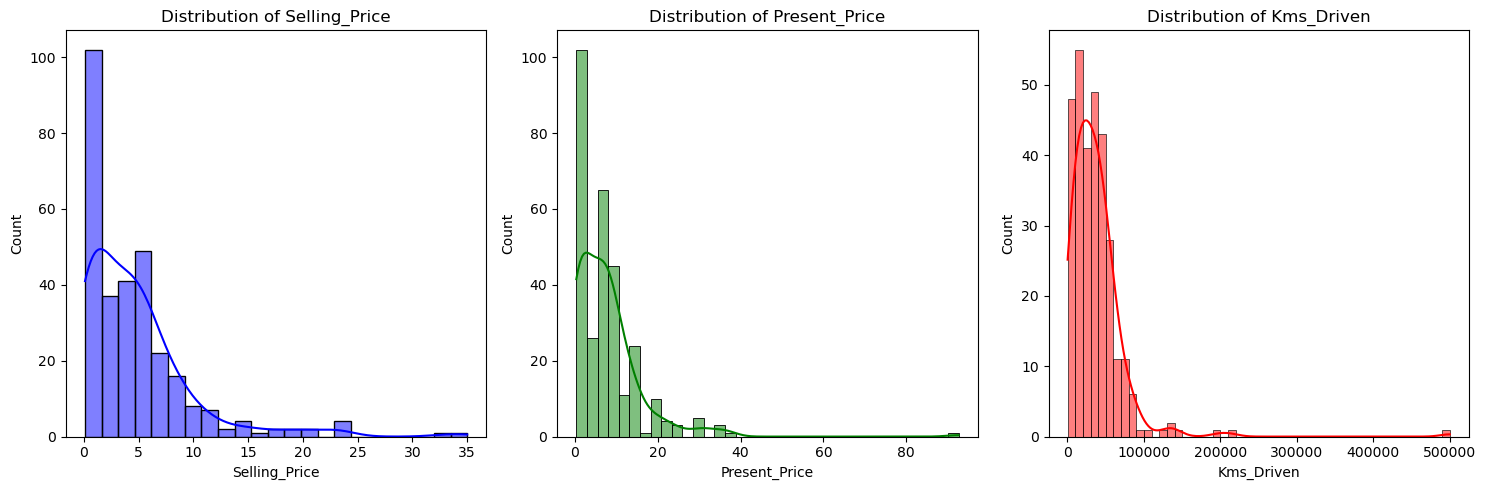

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Plot Selling_Price distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Selling_Price'], kde=True, color='blue')
plt.title('Distribution of Selling_Price')

# Plot Present_Price distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Present_Price'], kde=True, color='green')
plt.title('Distribution of Present_Price')

# Plot Kms_Driven distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Kms_Driven'], kde=True, color='red')
plt.title('Distribution of Kms_Driven')

# Show the plot
plt.tight_layout()
plt.show()


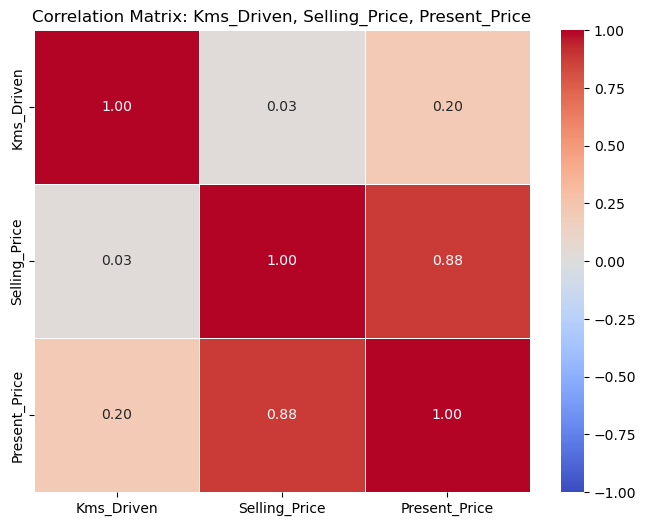

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to include in the correlation matrix
correlation_data = data[['Kms_Driven', 'Selling_Price', 'Present_Price']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix: Kms_Driven, Selling_Price, Present_Price')

# Show the plot
plt.show()


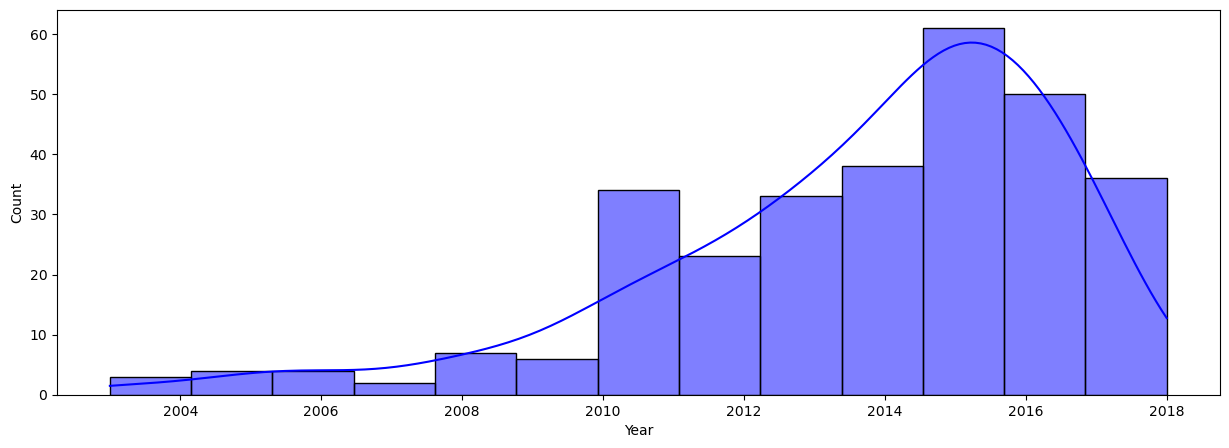

In [25]:
plt.figure(figsize=(15, 5))
plt.plot()
sns.histplot(data['Year'], kde = 'True', color = 'blue')
plt.show()

In [35]:
# Group by 'Year' and count the number of cars in each year
cars_count = data.groupby('Year').size()

# Print the result
print(cars_count)


Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
dtype: int64


In [52]:
# Calculate Depreciation_Rate and add it as a new column
data['Depreciation_Rate'] = (data['Present_Price'] - data['Selling_Price']) / (data['Current_Year'] - data['Year']) * 100


# Save the updated data to a new CSV file (optional)
data.to_csv(r"C:\Users\joema\Downloads\car data.csv", index=False)  # Replace 'updated_file.csv' with your desired file name

# Display the first few rows of the updated DataFrame
print(data[['Year', 'Present_Price', 'Selling_Price', 'Depreciation_Rate']].head())

   Year  Present_Price  Selling_Price  Depreciation_Rate
0  2014           5.59           3.35          20.363636
1  2013           9.54           4.75          39.916667
2  2017           9.85           7.25          32.500000
3  2011           4.15           2.85           9.285714
4  2014           6.87           4.60          20.636364


In [55]:
High_Depreciation = data[data['Depreciation_Rate']> 15]['Depreciation_Rate'].count()
Low_Depreciation= data[data['Depreciation_Rate']< 15]['Depreciation_Rate'].count()
print(f" High Depreciation: {High_Depreciation}, Low Depreciation: {Low_Depreciation}")

 High Depreciation: 148, Low Depreciation: 153


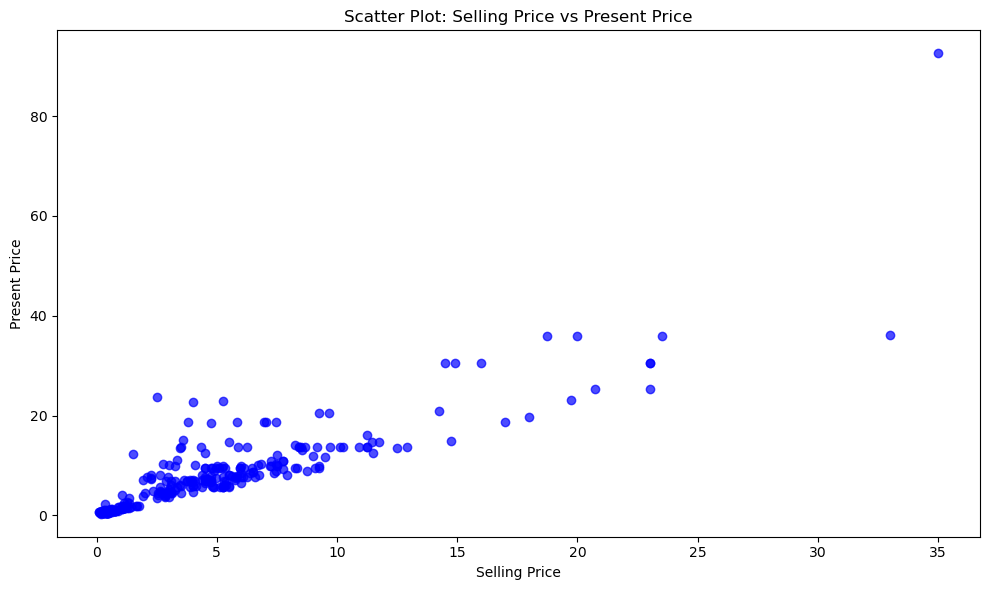

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joema\Downloads\CarData2.csv")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Selling_Price'], data['Present_Price'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.title('Scatter Plot: Selling Price vs Present Price')

# Show the plot
plt.tight_layout()
plt.show()